In [1]:
import psycopg2
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
bikes_wholesale_business = pd.read_csv('bikes_wholesale_business.csv', encoding='cp1252')

In [114]:
import csv

In [115]:
with open('bikes_wholesale_business.csv') as f:
    print(f)

<_io.TextIOWrapper name='bikes_wholesale_business.csv' mode='r' encoding='cp1252'>


In [4]:
bikes_wholesale_business

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,product_class,model_name,product_status,product_subcategory,product_category,products_start_date,products_end_date,continent,region,country
0,7/1/2016,14501,Ruben Prasad,5/13/1958,M,M,80000,0,Management,1,...,L,Road-650,NaN,Road Bikes,Bikes,7/1/2016,6/30/2017,North America,Southwest,United States
1,7/22/2016,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
2,7/22/2018,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
3,8/19/2016,14572,Melanie Foster,4/16/1991,M,F,70000,0,Professional,1,...,L,Road-650,NaN,Road Bikes,Bikes,7/1/2016,6/30/2017,North America,Southwest,United States
4,7/18/2016,11001,Eugene Huang,5/14/1985,S,M,60000,3,Professional,0,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,6/30/2019,27473,Gabriel Lal,1/10/1968,S,M,20000,1,Clerical,1,...,L,Road-750,Current,Road Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
15201,6/30/2019,26916,Mackenzie King,8/8/2000,M,F,10000,0,Manual,1,...,L,Road-750,Current,Road Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
15202,6/30/2019,22202,Roberto Diaz,7/6/1977,M,M,70000,0,Professional,1,...,H,Road-250,Current,Road Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
15203,6/30/2019,11512,Natalie Campbell,8/13/1974,S,F,20000,0,Manual,1,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,North America,Canada,Canada


In [30]:
bikes_wholesale_business.columns

Index(['order_date', 'customer_key', 'name', 'birth_date', 'marital_status',
       'gender', 'yearly_income', 'num_children', 'occupation', 'house_owner',
       'num_cars', 'address', 'phone', 'first_purchase_date', 'order_number',
       'ship_date', 'order_line', 'order_quantity', 'unit_price', 'unit_cost',
       'tax_amount', 'freight', 'product_name', 'product_colour', 'list_price',
       'size', 'size_range', 'weight', 'days_to_manufacture', 'product_line',
       'dealer_price', 'product_class', 'model_name', 'product_status',
       'product_subcategory', 'product_category', 'products_start_date',
       'products_end_date', 'continent', 'region', 'country'],
      dtype='object')

In [16]:
print(bikes_wholesale_business)

      order_date  customer_key              name birth_date marital_status  \
0       7/1/2016         14501      Ruben Prasad  5/13/1958              M   
1      7/22/2016         11000          Jon Yang   4/8/1986              M   
2      7/22/2018         11000          Jon Yang   4/8/1986              M   
3      8/19/2016         14572    Melanie Foster  4/16/1991              M   
4      7/18/2016         11001      Eugene Huang  5/14/1985              S   
...          ...           ...               ...        ...            ...   
15200  6/30/2019         27473       Gabriel Lal  1/10/1968              S   
15201  6/30/2019         26916    Mackenzie King   8/8/2000              M   
15202  6/30/2019         22202      Roberto Diaz   7/6/1977              M   
15203  6/30/2019         11512  Natalie Campbell  8/13/1974              S   
15204  6/30/2019         13735        Dennis Guo   5/7/1976              M   

      gender  yearly_income  num_children    occupation  house_

In [17]:
bikes_wholesale_business.head()

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,product_class,model_name,product_status,product_subcategory,product_category,products_start_date,products_end_date,continent,region,country
0,7/1/2016,14501,Ruben Prasad,5/13/1958,M,M,80000,0,Management,1,...,L,Road-650,NaN,Road Bikes,Bikes,7/1/2016,6/30/2017,North America,Southwest,United States
1,7/22/2016,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
2,7/22/2018,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
3,8/19/2016,14572,Melanie Foster,4/16/1991,M,F,70000,0,Professional,1,...,L,Road-650,NaN,Road Bikes,Bikes,7/1/2016,6/30/2017,North America,Southwest,United States
4,7/18/2016,11001,Eugene Huang,5/14/1985,S,M,60000,3,Professional,0,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia


In [18]:
bikes_wholesale_business.tail()

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,product_class,model_name,product_status,product_subcategory,product_category,products_start_date,products_end_date,continent,region,country
15200,6/30/2019,27473,Gabriel Lal,1/10/1968,S,M,20000,1,Clerical,1,...,L,Road-750,Current,Road Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
15201,6/30/2019,26916,Mackenzie King,8/8/2000,M,F,10000,0,Manual,1,...,L,Road-750,Current,Road Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
15202,6/30/2019,22202,Roberto Diaz,7/6/1977,M,M,70000,0,Professional,1,...,H,Road-250,Current,Road Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
15203,6/30/2019,11512,Natalie Campbell,8/13/1974,S,F,20000,0,Manual,1,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,North America,Canada,Canada
15204,6/30/2019,13735,Dennis Guo,5/7/1976,M,M,40000,0,Clerical,1,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,North America,Northwest,United States


In [19]:
bikes_wholesale_business['name'][0:5]

0      Ruben Prasad
1          Jon Yang
2          Jon Yang
3    Melanie Foster
4      Eugene Huang
Name: name, dtype: object

In [20]:
bikes_wholesale_business[['name','marital_status']][0:5]

,name,marital_status
0,Ruben Prasad,M
1,Jon Yang,M
2,Jon Yang,M
3,Melanie Foster,M
4,Eugene Huang,S


In [26]:
bikes_wholesale_business.iloc[0:4]

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,product_class,model_name,product_status,product_subcategory,product_category,products_start_date,products_end_date,continent,region,country
0,7/1/2016,14501,Ruben Prasad,5/13/1958,M,M,80000,0,Management,1,...,L,Road-650,NaN,Road Bikes,Bikes,7/1/2016,6/30/2017,North America,Southwest,United States
1,7/22/2016,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
2,7/22/2018,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
3,8/19/2016,14572,Melanie Foster,4/16/1991,M,F,70000,0,Professional,1,...,L,Road-650,NaN,Road Bikes,Bikes,7/1/2016,6/30/2017,North America,Southwest,United States


In [27]:
bikes_wholesale_business.iloc[3,2] # iloc is for integer indexing and loc is for axis label indexing

'Melanie Foster'

In [52]:
bikes_wholesale_business.loc[:3,['name', 'marital_status']]

,name,marital_status
0,Ruben Prasad,M
1,Jon Yang,M
2,Jon Yang,M
3,Melanie Foster,M


In [31]:
for item in bikes_wholesale_business.iterrows(): # iterrows generates tuple (df idex, series with fields as index and field value for that row as value column)
    print(item)
    break

(0, order_date                       7/1/2016
customer_key                        14501
name                         Ruben Prasad
birth_date                      5/13/1958
marital_status                          M
gender                                  M
yearly_income                       80000
num_children                            0
occupation                     Management
house_owner                             1
num_cars                                2
address                 249 Alexander Pl.
phone                        175-555-0159
first_purchase_date              7/1/2016
order_number                      SO43700
ship_date                        7/8/2016
order_line                              1
order_quantity                          1
unit_price                       699.0982
unit_cost                        413.1463
tax_amount                        55.9279
freight                           17.4775
product_name           Road-650 Black, 62
product_colour                

In [37]:
type(item[1])

pandas.core.series.Series

In [91]:
bikes_wholesale_business.loc[(bikes_wholesale_business.marital_status == 'M')
                            & (bikes_wholesale_business.gender == 'M')]

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
0,7/1/2016,14501,Ruben Prasad,5/13/1958,M,M,80000,0,Management,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982
1,7/22/2016,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.9900
2,7/22/2018,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.9900
7,7/10/2016,11002,Ruben Torres,8/12/1985,M,M,60000,3,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Owns House,3399.9900
8,7/4/2018,11002,Ruben Torres,8/12/1985,M,M,60000,3,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Owns House,2294.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15192,6/30/2019,13765,Jaime Shen,8/11/1988,M,M,30000,0,Clerical,1,...,7/1/2018,NaN,Europe,United Kingdom,United Kingdom,[10K - 30K],No Kids,No Cars,Owns House,1214.8500
15197,6/30/2019,14055,Alejandro Kumar,7/3/1980,M,M,60000,0,Skilled Manual,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2319.9900
15199,6/30/2019,13650,Jessie She,1/8/1991,M,M,110000,5,Management,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[101K - 150K],5,0,Owns House,2384.0700
15202,6/30/2019,22202,Roberto Diaz,7/6/1977,M,M,70000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2443.3500


In [62]:
bikes_wholesale_business.describe()

,customer_key,yearly_income,num_children,house_owner,num_cars,order_line,order_quantity,unit_price,unit_cost,tax_amount,freight,list_price,size,weight,days_to_manufacture,dealer_price
count,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.0,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.0,15205.000000
mean,19048.708780,61039.789543,0.952647,0.690891,1.367642,1.006445,1.0,1862.423193,1105.711815,148.993859,46.560626,1862.423193,47.418744,20.789935,4.0,1117.453916
std,5430.053829,33965.584637,1.500064,0.462141,1.164199,0.080026,0.0,944.116065,560.476474,75.529285,23.602903,944.116065,6.732939,4.581046,0.0,566.469639
min,11000.000000,10000.000000,0.000000,0.000000,0.000000,1.000000,1.0,539.990000,294.579700,43.199200,13.499800,539.990000,38.000000,13.770000,4.0,323.994000
25%,14191.000000,30000.000000,0.000000,0.000000,0.000000,1.000000,1.0,782.990000,486.706600,62.639200,19.574800,782.990000,42.000000,15.790000,4.0,469.794000
50%,18276.000000,60000.000000,0.000000,1.000000,1.000000,1.000000,1.0,2071.419600,1117.855900,165.713600,51.785500,2071.419600,46.000000,20.420000,4.0,1242.851800
75%,23781.000000,80000.000000,2.000000,1.000000,2.000000,1.000000,1.0,2384.070000,1481.937900,190.725600,59.601800,2384.070000,52.000000,24.130000,4.0,1430.442000
max,29483.000000,170000.000000,5.000000,1.000000,4.000000,2.000000,1.0,3578.270000,2171.294200,286.261600,89.456800,3578.270000,62.000000,30.000000,4.0,2146.962000


In [63]:
bikes_wholesale_business.sort_values(['yearly_income', 'occupation'], ascending = [True, False])

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,product_class,model_name,product_status,product_subcategory,product_category,products_start_date,products_end_date,continent,region,country
292,11/28/2016,11126,Shaun Carson,4/7/1969,M,M,10000,1,Skilled Manual,0,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
293,10/25/2018,11126,Shaun Carson,4/7/1969,M,M,10000,1,Skilled Manual,0,...,M,Mountain-400-W,Current,Mountain Bikes,Bikes,7/1/2018,NaN,Pacific,Australia,Australia
305,11/3/2016,11134,Larry Townsend,2/26/1966,S,M,10000,0,Skilled Manual,1,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
1950,6/10/2017,12014,Devin Sanders,2/9/1969,M,M,10000,1,Skilled Manual,1,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
1962,6/5/2017,12021,Deborah Yuan,2/13/1966,S,F,10000,0,Skilled Manual,0,...,H,Mountain-100,NaN,Mountain Bikes,Bikes,7/1/2016,6/30/2017,Pacific,Australia,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,6/20/2019,24402,Devin Alexander,7/6/1984,S,M,170000,0,Management,0,...,L,Road-750,Current,Road Bikes,Bikes,7/1/2018,NaN,North America,Southwest,United States
14845,6/21/2019,18147,Katrina Luo,10/23/1964,M,F,170000,4,Management,1,...,H,Touring-1000,Current,Touring Bikes,Bikes,7/1/2018,NaN,Europe,United Kingdom,United Kingdom
14865,6/21/2019,19942,Armando Navarro,8/8/1969,S,M,170000,5,Management,0,...,H,Mountain-200,Current,Mountain Bikes,Bikes,7/1/2018,NaN,Europe,United Kingdom,United Kingdom
14952,6/24/2019,26404,Trisha Wu,7/6/1973,M,F,170000,5,Management,1,...,M,Road-350-W,Current,Road Bikes,Bikes,7/1/2018,NaN,Europe,United Kingdom,United Kingdom


In [5]:
income_conditions = [bikes_wholesale_business['yearly_income'] <= 30000,
              bikes_wholesale_business['yearly_income'] <= 50000,
              bikes_wholesale_business['yearly_income'] <= 80000,
              bikes_wholesale_business['yearly_income'] <= 100000,
              bikes_wholesale_business['yearly_income'] <= 150000,
              bikes_wholesale_business['yearly_income'] >150000]

income_groups = ['[10K - 30K]', '[31K - 50K]', '[51K - 80K]', '[81K - 100K]', '[101K - 150K]', '150K+']

In [6]:
bikes_wholesale_business['income_group'] = np.select(income_conditions,income_groups)

In [7]:
bikes_wholesale_business[['yearly_income', 'income_group']]

,yearly_income,income_group
0,80000,[51K - 80K]
1,90000,[81K - 100K]
2,90000,[81K - 100K]
3,70000,[51K - 80K]
4,60000,[51K - 80K]
...,...,...
15200,20000,[10K - 30K]
15201,10000,[10K - 30K]
15202,70000,[51K - 80K]
15203,20000,[10K - 30K]


In [8]:
num_children_conditions = [bikes_wholesale_business['num_children'] == 0,
                           bikes_wholesale_business['num_children'] <= 2,
                           bikes_wholesale_business['num_children'] <= 4,
                           bikes_wholesale_business['num_children'] == 5
                          ]

num_children_groups = ['No Kids', '[1 - 2]', '[3 - 4]', '5']

In [9]:
bikes_wholesale_business['num_child_category'] = np.select(num_children_conditions,num_children_groups)

In [10]:
bikes_wholesale_business[['num_children','num_child_category']]

,num_children,num_child_category
0,0,No Kids
1,0,No Kids
2,0,No Kids
3,0,No Kids
4,3,[3 - 4]
...,...,...
15200,1,[1 - 2]
15201,0,No Kids
15202,0,No Kids
15203,0,No Kids


In [11]:
num_car_conditions = [bikes_wholesale_business['num_cars'] == 0,
                           bikes_wholesale_business['num_cars'] <= 2,
                           bikes_wholesale_business['num_cars'] <= 4
                     ]
num_car_groups = ['No Cars', '[1 - 2]', '[3 - 4]']

In [12]:
bikes_wholesale_business['num_cars_category'] = np.select(num_car_conditions,num_car_groups)

In [13]:
bikes_wholesale_business[['num_cars','num_cars_category']]

,num_cars,num_cars_category
0,2,[1 - 2]
1,0,No Cars
2,0,No Cars
3,0,No Cars
4,1,[1 - 2]
...,...,...
15200,2,[1 - 2]
15201,1,[1 - 2]
15202,2,[1 - 2]
15203,2,[1 - 2]


In [14]:
house_owner_conditions = [bikes_wholesale_business['house_owner'] == 1,
                      bikes_wholesale_business['house_owner'] == 0
                          
                     ]
house_owner_category = ['Owns House', "Doesn't Owns House"]

In [15]:
bikes_wholesale_business['Owns a House?'] = np.select(house_owner_conditions,house_owner_category)

In [16]:
bikes_wholesale_business[['house_owner','Owns a House?']]

,house_owner,Owns a House?
0,1,Owns House
1,1,Owns House
2,1,Owns House
3,1,Owns House
4,0,Doesn't Owns House
...,...,...
15200,1,Owns House
15201,1,Owns House
15202,1,Owns House
15203,1,Owns House


In [17]:
bikes_wholesale_business['Sales'] = bikes_wholesale_business['unit_price'] * bikes_wholesale_business['order_quantity']

In [18]:
bikes_wholesale_business['Sales']

0         699.0982
1        3399.9900
2        2319.9900
3         699.0982
4        3374.9900
           ...    
15200     539.9900
15201     539.9900
15202    2443.3500
15203    2319.9900
15204    2319.9900
Name: Sales, Length: 15205, dtype: float64

In [88]:
bikes_wholesale_business.columns

Index(['order_date', 'customer_key', 'name', 'birth_date', 'marital_status',
       'gender', 'yearly_income', 'num_children', 'occupation', 'house_owner',
       'num_cars', 'address', 'phone', 'first_purchase_date', 'order_number',
       'ship_date', 'order_line', 'order_quantity', 'unit_price', 'unit_cost',
       'tax_amount', 'freight', 'product_name', 'product_colour', 'list_price',
       'size', 'size_range', 'weight', 'days_to_manufacture', 'product_line',
       'dealer_price', 'product_class', 'model_name', 'product_status',
       'product_subcategory', 'product_category', 'products_start_date',
       'products_end_date', 'continent', 'region', 'country', 'income_group',
       'num_child_category', 'num_cars_category', 'Owns a House?', 'Sales'],
      dtype='object')

In [96]:
bikes_wholesale_business.loc[bikes_wholesale_business['name'].str.contains('Jon')]

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
1,7/22/2016,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.99
2,7/22/2018,11000,Jon Yang,4/8/1986,M,M,90000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.99
68,7/16/2016,13257,Jon Chander,7/6/1977,M,M,130000,4,Professional,1,...,7/1/2016,6/30/2017,Europe,Germany,Germany,[101K - 150K],[3 - 4],[3 - 4],Owns House,3578.27
69,9/11/2018,13257,Jon Chander,7/6/1977,M,M,130000,4,Professional,1,...,7/1/2018,NaN,Europe,Germany,Germany,[101K - 150K],[3 - 4],[3 - 4],Owns House,539.99
149,9/19/2016,11060,Jon Zhou,3/17/1974,M,M,80000,0,Skilled Manual,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,3399.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14838,6/21/2019,22523,Jon Xu,7/17/1982,M,M,40000,0,Skilled Manual,1,...,7/1/2018,NaN,Europe,Germany,Germany,[31K - 50K],No Kids,[1 - 2],Owns House,769.49
14975,6/25/2019,22186,Jonathan Foster,10/4/1995,S,M,60000,0,Skilled Manual,0,...,7/1/2018,NaN,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Doesn't Owns House,1120.49
15075,6/27/2019,15440,Jon Pal,3/23/1994,M,M,10000,0,Manual,1,...,7/1/2018,NaN,Europe,United Kingdom,United Kingdom,[10K - 30K],No Kids,No Cars,Owns House,2294.99
15110,6/28/2019,15523,Jonathan Yang,2/8/1984,S,M,40000,0,Professional,1,...,7/1/2018,NaN,North America,Northwest,United States,[31K - 50K],No Kids,[1 - 2],Owns House,769.49


In [97]:
bikes_wholesale_business.loc[~bikes_wholesale_business['name'].str.contains('Jon')]

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
0,7/1/2016,14501,Ruben Prasad,5/13/1958,M,M,80000,0,Management,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982
3,8/19/2016,14572,Melanie Foster,4/16/1991,M,F,70000,0,Professional,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,No Cars,Owns House,699.0982
4,7/18/2016,11001,Eugene Huang,5/14/1985,S,M,60000,3,Professional,0,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Doesn't Owns House,3374.9900
5,7/20/2018,11001,Eugene Huang,5/14/1985,S,M,60000,3,Professional,0,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Doesn't Owns House,2319.9900
6,9/16/2016,14580,Kyle Diaz,3/17/1987,S,M,40000,0,Professional,0,...,7/1/2016,6/30/2017,North America,Southwest,United States,[31K - 50K],No Kids,[1 - 2],Doesn't Owns House,699.0982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,6/30/2019,27473,Gabriel Lal,1/10/1968,S,M,20000,1,Clerical,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[10K - 30K],[1 - 2],[1 - 2],Owns House,539.9900
15201,6/30/2019,26916,Mackenzie King,8/8/2000,M,F,10000,0,Manual,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[10K - 30K],No Kids,[1 - 2],Owns House,539.9900
15202,6/30/2019,22202,Roberto Diaz,7/6/1977,M,M,70000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2443.3500
15203,6/30/2019,11512,Natalie Campbell,8/13/1974,S,F,20000,0,Manual,1,...,7/1/2018,NaN,North America,Canada,Canada,[10K - 30K],No Kids,[1 - 2],Owns House,2319.9900


In [98]:
import re

In [101]:
bikes_wholesale_business.loc[bikes_wholesale_business['name'].str.contains('^Ma[a-z]*', flags = re.I, regex = True)]

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
22,7/12/2016,11007,Marco Mehta,5/9/1984,M,M,60000,3,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Owns House,3399.99
23,7/25/2018,11007,Marco Mehta,5/9/1984,M,M,60000,3,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Owns House,2294.99
24,9/20/2018,11007,Marco Mehta,5/9/1984,M,M,60000,3,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[3 - 4],Owns House,2384.07
33,7/9/2016,11238,Mayra Prasad,8/10/1978,S,F,130000,3,Management,0,...,7/1/2016,6/30/2017,Europe,United Kingdom,United Kingdom,[101K - 150K],[3 - 4],[3 - 4],Doesn't Owns House,3399.99
34,7/25/2018,11238,Mayra Prasad,8/10/1978,S,F,130000,3,Management,0,...,7/1/2018,NaN,Europe,United Kingdom,United Kingdom,[101K - 150K],[3 - 4],[3 - 4],Doesn't Owns House,2294.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15103,6/28/2019,18403,Madeline Phillips,2/26/1981,S,F,80000,4,Professional,1,...,7/1/2018,NaN,North America,Northwest,United States,[51K - 80K],[3 - 4],[3 - 4],Owns House,2294.99
15139,6/29/2019,28288,Marco Srini,9/1/1980,S,M,110000,3,Professional,1,...,7/1/2018,NaN,North America,Southwest,United States,[101K - 150K],[3 - 4],[3 - 4],Owns House,2384.07
15164,6/29/2019,13777,Manuel Perez,11/13/1987,M,M,30000,1,Clerical,1,...,7/1/2018,NaN,Europe,United Kingdom,United Kingdom,[10K - 30K],[1 - 2],No Cars,Owns House,1214.85
15178,6/29/2019,12808,Marc Schmidt,5/11/1988,M,M,40000,0,Clerical,1,...,7/1/2018,NaN,Europe,United Kingdom,United Kingdom,[31K - 50K],No Kids,No Cars,Owns House,742.35


In [19]:
bikes_wholesale_business.loc[bikes_wholesale_business['gender'] == 'M', 'gender'] = 'Male'

In [20]:
bikes_wholesale_business.loc[bikes_wholesale_business['gender'] == 'F', 'gender'] = 'Female'

In [21]:
bikes_wholesale_business

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
0,7/1/2016,14501,Ruben Prasad,5/13/1958,M,Male,80000,0,Management,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982
1,7/22/2016,11000,Jon Yang,4/8/1986,M,Male,90000,0,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.9900
2,7/22/2018,11000,Jon Yang,4/8/1986,M,Male,90000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.9900
3,8/19/2016,14572,Melanie Foster,4/16/1991,M,Female,70000,0,Professional,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,No Cars,Owns House,699.0982
4,7/18/2016,11001,Eugene Huang,5/14/1985,S,Male,60000,3,Professional,0,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[1 - 2],Doesn't Owns House,3374.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,6/30/2019,27473,Gabriel Lal,1/10/1968,S,Male,20000,1,Clerical,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[10K - 30K],[1 - 2],[1 - 2],Owns House,539.9900
15201,6/30/2019,26916,Mackenzie King,8/8/2000,M,Female,10000,0,Manual,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[10K - 30K],No Kids,[1 - 2],Owns House,539.9900
15202,6/30/2019,22202,Roberto Diaz,7/6/1977,M,Male,70000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2443.3500
15203,6/30/2019,11512,Natalie Campbell,8/13/1974,S,Female,20000,0,Manual,1,...,7/1/2018,NaN,North America,Canada,Canada,[10K - 30K],No Kids,[1 - 2],Owns House,2319.9900


In [22]:
bikes_wholesale_business.loc[bikes_wholesale_business['marital_status'] == 'M', 'marital_status'] = 'Married'
bikes_wholesale_business.loc[bikes_wholesale_business['marital_status'] == 'S', 'marital_status'] = 'Single'

In [23]:
bikes_wholesale_business

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
0,7/1/2016,14501,Ruben Prasad,5/13/1958,Married,Male,80000,0,Management,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982
1,7/22/2016,11000,Jon Yang,4/8/1986,Married,Male,90000,0,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.9900
2,7/22/2018,11000,Jon Yang,4/8/1986,Married,Male,90000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.9900
3,8/19/2016,14572,Melanie Foster,4/16/1991,Married,Female,70000,0,Professional,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,No Cars,Owns House,699.0982
4,7/18/2016,11001,Eugene Huang,5/14/1985,Single,Male,60000,3,Professional,0,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[1 - 2],Doesn't Owns House,3374.9900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,6/30/2019,27473,Gabriel Lal,1/10/1968,Single,Male,20000,1,Clerical,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[10K - 30K],[1 - 2],[1 - 2],Owns House,539.9900
15201,6/30/2019,26916,Mackenzie King,8/8/2000,Married,Female,10000,0,Manual,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[10K - 30K],No Kids,[1 - 2],Owns House,539.9900
15202,6/30/2019,22202,Roberto Diaz,7/6/1977,Married,Male,70000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2443.3500
15203,6/30/2019,11512,Natalie Campbell,8/13/1974,Single,Female,20000,0,Manual,1,...,7/1/2018,NaN,North America,Canada,Canada,[10K - 30K],No Kids,[1 - 2],Owns House,2319.9900


In [24]:
bikes_wholesale_business.groupby(['occupation']).sum().round()['unit_price']

occupation
Clerical          4529392.0
Management        5279693.0
Manual            2745082.0
Professional      9578588.0
Skilled Manual    6185389.0
Name: unit_price, dtype: float64

In [119]:
bikes_wholesale_business['unit_price'].sum()

28318144.650700003

In [24]:
# os.listdir("folder_name") - This will get list of all the files names in the folder

In [25]:
# pd.concat(name of file into which you want to merge, file that needs to be merged)

In [26]:
# bikes_wholesale_business[bikes_wholesale_business.isna().any(axis = 1)] - This will find all rows with na available.

In [27]:
# bikes_wholesale_business.dropna(how = any or all) - this will drop all na rows with na value.

In [28]:
# bikes_wholesale_business[column_name] = bikes_wholesale_business[column_name].astype(int32 or any other type)
# This will change the data type of the column.

In [29]:
# pd.to_numeric(column_name) will convert the datatype to appropriate numerice type.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/harde/Adventure Works/Customeru.csv")

In [4]:
df

,CustomerKey,Name,BirtDate,MaritalStatus,Gender,YearlyIncome,NumberCildrenAtome,Occupation,ouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Pone,DateFirstPurcase
0,11602,Larry Gill,4/13/1977,S,M,"30,000.00",0,Clerical,0,1,Am Gallberg 645,NaN,1 (11) 500 555-0125,1/11/2004
1,11603,Geoffrey Gonzalez,2/6/1977,S,M,"30,000.00",0,Clerical,0,1,1538 Golden Meadow,NaN,1 (11) 500 555-0131,7/21/2002
2,11610,Blake Collins,4/23/1975,S,M,"30,000.00",0,Clerical,0,1,4519 Lydia Lane,NaN,1 (11) 500 555-0140,7/13/2002
3,12517,Alexa Watson,8/25/1977,S,F,"30,000.00",0,Clerical,0,1,Residenz Straße 98,NaN,1 (11) 500 555-0191,4/21/2004
4,12518,Jacquelyn Dominguez,9/27/1977,S,F,"30,000.00",0,Clerical,0,1,Werftstr 544,NaN,1 (11) 500 555-0134,2/2/2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,28890,Jaclyn Ma,4/15/1945,M,F,"90,000.00",0,Professional,1,2,Carlsplatz 4650,Verkaufsabteilung,1 (11) 500 555-0184,1/7/2004
18480,28940,Kristine Serrano,8/23/1974,M,F,"80,000.00",0,Professional,1,3,3365 Aterton Circle,# 13,1 (11) 500 555-0178,9/26/2003
18481,29344,Gilbert Ye,11/10/1942,S,M,"40,000.00",0,Management,1,2,2775 Delta View Ln.,#9,1 (11) 500 555-0115,6/28/2004
18482,29355,Virginia Fernandez,11/3/1968,M,F,"40,000.00",0,Clerical,1,0,Krönerweg 9679,Einkaufsabteilung,1 (11) 500 555-0116,7/4/2003


In [60]:
bikes_wholesale_business.columns

Index(['order_date', 'customer_key', 'name', 'birth_date', 'marital_status',
       'gender', 'yearly_income', 'num_children', 'occupation', 'house_owner',
       'num_cars', 'address', 'phone', 'first_purchase_date', 'order_number',
       'ship_date', 'order_line', 'order_quantity', 'unit_price', 'unit_cost',
       'tax_amount', 'freight', 'product_name', 'product_colour', 'list_price',
       'size', 'size_range', 'weight', 'days_to_manufacture', 'product_line',
       'dealer_price', 'product_class', 'model_name', 'product_status',
       'product_subcategory', 'product_category', 'products_start_date',
       'products_end_date', 'continent', 'region', 'country', 'income_group',
       'num_child_category', 'num_cars_category', 'Owns a House?', 'Sales'],
      dtype='object')

In [26]:
sales_by_occupation_house_ownership = bikes_wholesale_business.pivot_table(values = 'Sales', columns = 'Owns a House?', index = 'occupation', aggfunc='sum' )

In [27]:
sales_by_occupation_house_ownership.index

Index(['Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'], dtype='object', name='occupation')

In [28]:
sales_by_occupation_house_ownership

Owns a House?,Doesn't Owns House,Owns House
occupation,,
Clerical,1.023433e+06,3.505959e+06
Management,1.520332e+06,3.759361e+06
Manual,1.195858e+06,1.549225e+06
Professional,3.334865e+06,6.243724e+06
Skilled Manual,1.580524e+06,4.604864e+06


In [29]:


occupation = sales_by_occupation_house_ownership.index
sales1 = sales_by_occupation_house_ownership["Doesn't Owns House"]
sales2 = sales_by_occupation_house_ownership["Owns House"]
sales1



occupation
Clerical          1.023433e+06
Management        1.520332e+06
Manual            1.195858e+06
Professional      3.334865e+06
Skilled Manual    1.580524e+06
Name: Doesn't Owns House, dtype: float64

In [83]:
sales2

occupation
Clerical          3.505959e+06
Management        3.759361e+06
Manual            1.549225e+06
Professional      6.243724e+06
Skilled Manual    4.604864e+06
Name: Owns House, dtype: float64

In [86]:
import matplotlib.pyplot as plt

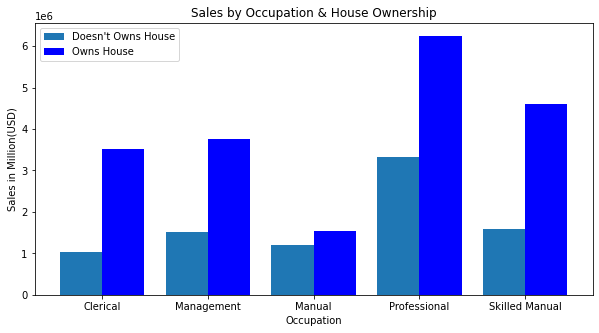

In [30]:
index = np.arange(len(occupation))
w = 0.4
plt.figure(figsize = (10,5))
plt.bar(index,sales1,w, label = "Doesn't Owns House")
plt.bar(index + 0.4,sales2,w, color = 'blue', label = "Owns House")
plt.title('Sales by Occupation & House Ownership')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Occupation')
plt.xticks(index + 0.2, occupation)
plt.legend()




plt.show()

In [31]:
bikes_wholesale_business.groupby('occupation').sum().round()['Sales']

occupation
Clerical          4529392.0
Management        5279693.0
Manual            2745082.0
Professional      9578588.0
Skilled Manual    6185389.0
Name: Sales, dtype: float64

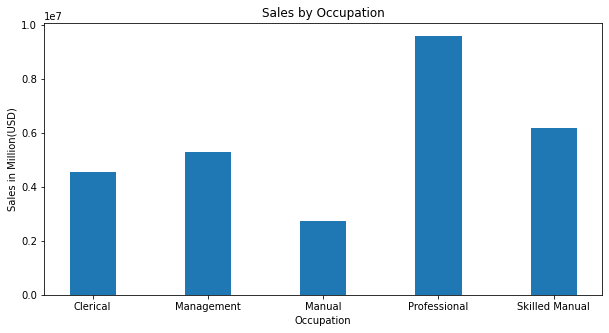

In [32]:
occupation = [occ for occ,df in bikes_wholesale_business.groupby('occupation')]
sales_by_occu = bikes_wholesale_business.groupby('occupation').sum().round()['Sales']
w = 0.4
plt.figure(figsize = (10,5))
plt.bar(occupation,sales_by_occu,w)

plt.title('Sales by Occupation')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Occupation')

plt.show()

In [121]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes 

In [34]:
bikes_wholesale_business.head()

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,products_start_date,products_end_date,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales
0,7/1/2016,14501,Ruben Prasad,5/13/1958,Married,Male,80000,0,Management,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982
1,7/22/2016,11000,Jon Yang,4/8/1986,Married,Male,90000,0,Professional,1,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.9900
2,7/22/2018,11000,Jon Yang,4/8/1986,Married,Male,90000,0,Professional,1,...,7/1/2018,NaN,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.9900
3,8/19/2016,14572,Melanie Foster,4/16/1991,Married,Female,70000,0,Professional,1,...,7/1/2016,6/30/2017,North America,Southwest,United States,[51K - 80K],No Kids,No Cars,Owns House,699.0982
4,7/18/2016,11001,Eugene Huang,5/14/1985,Single,Male,60000,3,Professional,0,...,7/1/2016,6/30/2017,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[1 - 2],Doesn't Owns House,3374.9900


In [37]:
bikes_wholesale_business['order_date'] = pd.to_datetime(bikes_wholesale_business['order_date'])

In [38]:
bikes_wholesale_business['order_date']

0       2016-07-01
1       2016-07-22
2       2018-07-22
3       2016-08-19
4       2016-07-18
           ...    
15200   2019-06-30
15201   2019-06-30
15202   2019-06-30
15203   2019-06-30
15204   2019-06-30
Name: order_date, Length: 15205, dtype: datetime64[ns]

In [39]:
bikes_wholesale_business['birth_date'] = pd.to_datetime(bikes_wholesale_business['birth_date'])
bikes_wholesale_business['ship_date'] = pd.to_datetime(bikes_wholesale_business['ship_date'])
bikes_wholesale_business['products_end_date'] = pd.to_datetime(bikes_wholesale_business['products_end_date'])
bikes_wholesale_business['products_start_date'] = pd.to_datetime(bikes_wholesale_business['products_start_date'])

In [41]:
bikes_wholesale_business['Order Year'] = bikes_wholesale_business['order_date'].dt.year

In [42]:
bikes_wholesale_business['Order Year']

0        2016
1        2016
2        2018
3        2016
4        2016
         ... 
15200    2019
15201    2019
15202    2019
15203    2019
15204    2019
Name: Order Year, Length: 15205, dtype: int64

In [43]:
bikes_wholesale_business['Order Quarter'] = bikes_wholesale_business['order_date'].dt.quarter

In [107]:
bikes_wholesale_business['Year - Quarter'].drop

<bound method Series.drop of 0        0        2016\n1        2016\n2        2018\n3...
1        0        2016\n1        2016\n2        2018\n3...
2        0        2016\n1        2016\n2        2018\n3...
3        0        2016\n1        2016\n2        2018\n3...
4        0        2016\n1        2016\n2        2018\n3...
                               ...                        
15200    0        2016\n1        2016\n2        2018\n3...
15201    0        2016\n1        2016\n2        2018\n3...
15202    0        2016\n1        2016\n2        2018\n3...
15203    0        2016\n1        2016\n2        2018\n3...
15204    0        2016\n1        2016\n2        2018\n3...
Name: Year - Quarter, Length: 15205, dtype: object>

In [55]:
sales_trend = bikes_wholesale_business[['Order Year', 'Order Quarter', 'Sales']]

In [63]:
sales_trend.groupby(['Order Year', 'Order Quarter']). sum()['Sales']

Order Year  Order Quarter
2016        3                1.453523e+06
            4                1.812851e+06
2017        1                1.791698e+06
            2                2.014012e+06
            3                1.396834e+06
            4                1.327799e+06
2018        1                1.413530e+06
            2                1.623971e+06
            3                2.569678e+06
            4                3.751923e+06
2019        1                4.024025e+06
            2                5.138299e+06
Name: Sales, dtype: float64

In [58]:
for x, *rest in sales_trend.groupby(['Order Year', 'Order Quarter']):
    print (x, *rest)
    break

(2016, 3)      Order Year  Order Quarter      Sales
0          2016              3   699.0982
1          2016              3  3399.9900
3          2016              3   699.0982
4          2016              3  3374.9900
6          2016              3   699.0982
..          ...            ...        ...
867        2016              3  3578.2700
870        2016              3  3578.2700
873        2016              3  3578.2700
876        2016              3  3578.2700
879        2016              3  3578.2700

[448 rows x 3 columns]


In [61]:
year_quarter = [yr_qt for yr_qt, df in sales_trend.groupby(['Order Year', 'Order Quarter'])]

In [71]:
year_quarter

[(2016, 3),
 (2016, 4),
 (2017, 1),
 (2017, 2),
 (2017, 3),
 (2017, 4),
 (2018, 1),
 (2018, 2),
 (2018, 3),
 (2018, 4),
 (2019, 1),
 (2019, 2)]

In [119]:
yr_qrt = []
for yr, qrt in year_quarter:
    yrqrt = "{0} Q{1}".format(yr, qrt)
    yr_qrt.append(yrqrt)


In [120]:
yr_qrt

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

In [97]:
sales_by_yr_qt = sales_trend.groupby(['Order Year', 'Order Quarter']).sum()['Sales']

In [114]:
sales_by_yr_qt

Order Year  Order Quarter
2016        3                1.453523e+06
            4                1.812851e+06
2017        1                1.791698e+06
            2                2.014012e+06
            3                1.396834e+06
            4                1.327799e+06
2018        1                1.413530e+06
            2                1.623971e+06
            3                2.569678e+06
            4                3.751923e+06
2019        1                4.024025e+06
            2                5.138299e+06
Name: Sales, dtype: float64

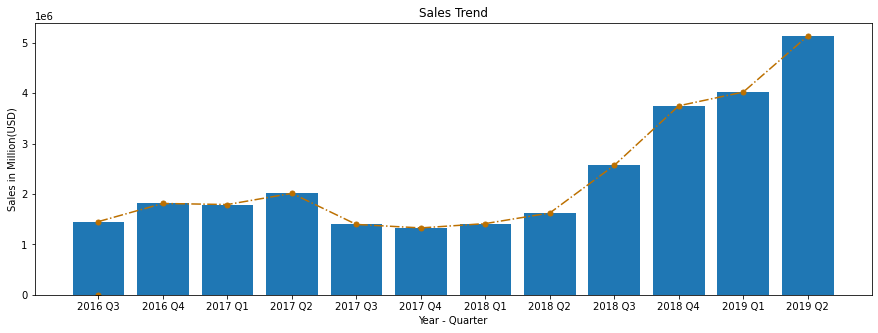

In [218]:
w = 0.8
plt.figure(figsize = (15,5))
plt.bar(yr_qrt,sales_by_yr_qt, w)
plt.plot(yr_qrt,sales_by_yr_qt, w, linestyle = '-.', marker = '.', markersize = 10, color = '#BC7000')

plt.title('Sales Trend')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Year - Quarter')

plt.show()

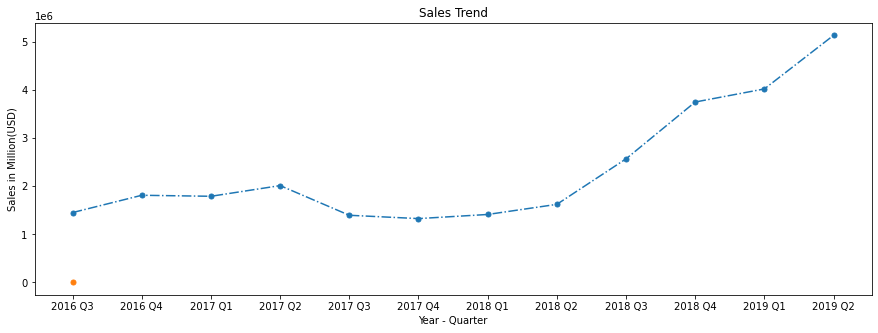

In [215]:
w = 0.8
plt.figure(figsize = (15,5))
plt.plot(yr_qrt,sales_by_yr_qt, w, linestyle = '-.', marker = '.', markersize = 10)

plt.title('Sales Trend')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Year - Quarter')

plt.show()

In [109]:
del bikes_wholesale_business['Year - Quarter']

In [111]:
bikes_wholesale_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15205 entries, 0 to 15204
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           15205 non-null  datetime64[ns]
 1   customer_key         15205 non-null  int64         
 2   name                 15205 non-null  object        
 3   birth_date           15205 non-null  datetime64[ns]
 4   marital_status       15205 non-null  object        
 5   gender               15205 non-null  object        
 6   yearly_income        15205 non-null  int64         
 7   num_children         15205 non-null  int64         
 8   occupation           15205 non-null  object        
 9   house_owner          15205 non-null  int64         
 10  num_cars             15205 non-null  int64         
 11  address              15205 non-null  object        
 12  phone                15205 non-null  object        
 13  first_purchase_date  15205 non-

In [124]:
bikes_wholesale_business.groupby('product_subcategory').sum()['Sales']

product_subcategory
Mountain Bikes    9.952760e+06
Road Bikes        1.452058e+07
Touring Bikes     3.844801e+06
Name: Sales, dtype: float64

In [127]:
Bikes = [bike for bike, df in bikes_wholesale_business.groupby('product_subcategory')]

In [128]:
sales_by_bike_types = bikes_wholesale_business.groupby('product_subcategory').sum()['Sales']

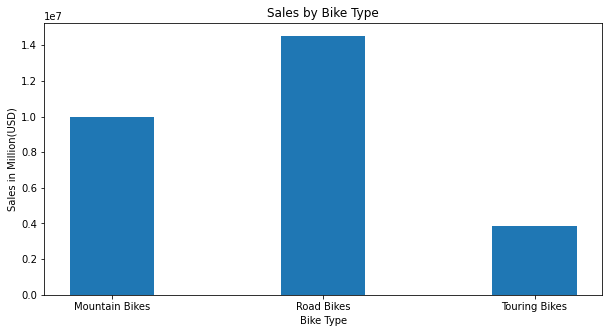

In [134]:
w = 0.4
plt.figure(figsize = (10,5))
plt.bar(Bikes,sales_by_bike_types, w)

plt.title('Sales by Bike Type')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Bike Type')

plt.show()

In [151]:
sales_by_period_occupation = bikes_wholesale_business.pivot_table(values = 'Sales', columns = 'occupation', index = ['Order Year', 'Order Quarter'], aggfunc='sum' )

In [143]:
sales_by_period_occupation.index

MultiIndex([(2016, 3),
            (2016, 4),
            (2017, 1),
            (2017, 2),
            (2017, 3),
            (2017, 4),
            (2018, 1),
            (2018, 2),
            (2018, 3),
            (2018, 4),
            (2019, 1),
            (2019, 2)],
           names=['Order Year', 'Order Quarter'])

In [144]:
yr_qrt = []
for yr, qrt in sales_by_period_occupation.index:
    yrqrt = "{0} Q{1}".format(yr, qrt)
    yr_qrt.append(yrqrt)

In [145]:
yr_qrt

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

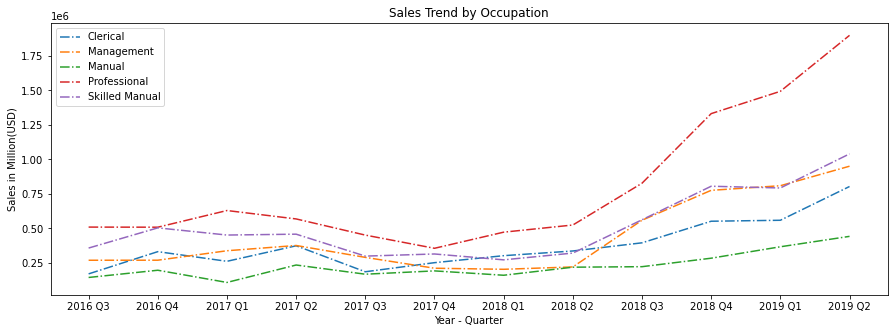

In [150]:

plt.figure(figsize = (15,5))
plt.plot(yr_qrt,sales_by_period_occupation['Clerical'], linestyle = '-.', label = 'Clerical')
plt.plot(yr_qrt,sales_by_period_occupation['Management'], linestyle = '-.', label = 'Management')
plt.plot(yr_qrt,sales_by_period_occupation['Manual'], linestyle = '-.', label = 'Manual')
plt.plot(yr_qrt,sales_by_period_occupation['Professional'], linestyle = '-.', label = 'Professional')
plt.plot(yr_qrt,sales_by_period_occupation['Skilled Manual'], linestyle = '-.', label = 'Skilled Manual')

plt.legend()
plt.title('Sales Trend by Occupation')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Year - Quarter')

plt.show()

In [146]:
sales_by_period_occupation

occupation                   Clerical   Management       Manual  Professional  \
Order Year Order Quarter                                                        
2016       3              170922.2756  269632.6238  144903.0138  5.099855e+05   
           4              331996.1694  269990.7200  197260.5830  5.091664e+05   
2017       1              262019.9678  338555.3838  108796.5328  6.300237e+05   
           2              374482.4926  376636.9146  235146.6128  5.690823e+05   
           3              186232.9428  290512.3119  168467.6106  4.519381e+05   
           4              252092.0992  211795.6172  192507.7703  3.563270e+05   
2018       1              302782.8893  204115.4249  160923.1036  4.731406e+05   
           2              336851.7663  221176.1583  219322.1963  5.250103e+05   
           3              395969.9500  559728.0800  223057.3100  8.279775e+05   
           4              552461.4800  776473.0900  284551.5200  1.332327e+06   
2019       1              559415.9900  809801.4100  367340.6900  1.494028e+06   
           2              804163.8500  951275.5100  442805.3300  1.899582e+06   

occupation                Skilled Manual  
Order Year Order Quarter                  
2016       3                3.580795e+05  
           4                5.044369e+05  
2017       1                4.523029e+05  
           2                4.586638e+05  
           3                2.996827e+05  
           4                3.150768e+05  
2018       1                2.725683e+05  
           2                3.216106e+05  
           3                5.629454e+05  
           4                8.061097e+05  
2019       1                7.934394e+05  
           2                1.040473e+06

In [152]:
sales_by_occup_gender = bikes_wholesale_business.pivot_table(values = 'Sales', columns = 'gender', index = 'occupation', aggfunc='sum' )

In [153]:
sales_by_occup_gender

gender,Female,Male
occupation,,
Clerical,2.187499e+06,2.341893e+06
Management,2.584787e+06,2.694907e+06
Manual,1.341225e+06,1.403857e+06
Professional,4.965817e+06,4.612771e+06
Skilled Manual,3.217911e+06,2.967478e+06


In [154]:
occupation_g = [occ for occ in sales_by_occup_gender.index]

In [155]:
occupation_g

['Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual']

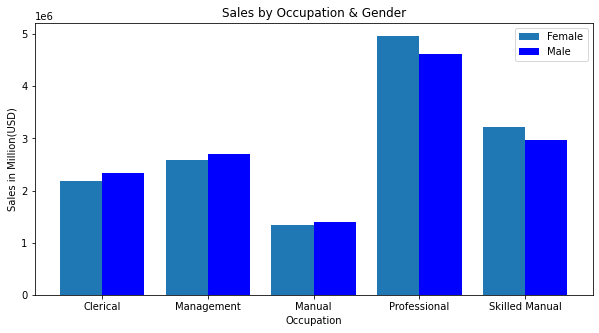

In [156]:
index = np.arange(len(occupation))
w = 0.4
plt.figure(figsize = (10,5))
plt.bar(index,sales_by_occup_gender['Female'],w, label = "Female")
plt.bar(index + 0.4,sales_by_occup_gender['Male'],w, color = 'blue', label = "Male")
plt.title('Sales by Occupation & Gender')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Occupation')
plt.xticks(index + 0.2, occupation)
plt.legend()




plt.show()

In [157]:
bikes_wholesale_business

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,continent,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales,Order Year,Order Quarter
0,2016-07-01,14501,Ruben Prasad,1958-05-13,Married,Male,80000,0,Management,1,...,North America,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982,2016,3
1,2016-07-22,11000,Jon Yang,1986-04-08,Married,Male,90000,0,Professional,1,...,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.9900,2016,3
2,2018-07-22,11000,Jon Yang,1986-04-08,Married,Male,90000,0,Professional,1,...,Pacific,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.9900,2018,3
3,2016-08-19,14572,Melanie Foster,1991-04-16,Married,Female,70000,0,Professional,1,...,North America,Southwest,United States,[51K - 80K],No Kids,No Cars,Owns House,699.0982,2016,3
4,2016-07-18,11001,Eugene Huang,1985-05-14,Single,Male,60000,3,Professional,0,...,Pacific,Australia,Australia,[51K - 80K],[3 - 4],[1 - 2],Doesn't Owns House,3374.9900,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,2019-06-30,27473,Gabriel Lal,1968-01-10,Single,Male,20000,1,Clerical,1,...,Pacific,Australia,Australia,[10K - 30K],[1 - 2],[1 - 2],Owns House,539.9900,2019,2
15201,2019-06-30,26916,Mackenzie King,2000-08-08,Married,Female,10000,0,Manual,1,...,Pacific,Australia,Australia,[10K - 30K],No Kids,[1 - 2],Owns House,539.9900,2019,2
15202,2019-06-30,22202,Roberto Diaz,1977-07-06,Married,Male,70000,0,Professional,1,...,Pacific,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2443.3500,2019,2
15203,2019-06-30,11512,Natalie Campbell,1974-08-13,Single,Female,20000,0,Manual,1,...,North America,Canada,Canada,[10K - 30K],No Kids,[1 - 2],Owns House,2319.9900,2019,2


In [158]:
bikes_wholesale_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15205 entries, 0 to 15204
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           15205 non-null  datetime64[ns]
 1   customer_key         15205 non-null  int64         
 2   name                 15205 non-null  object        
 3   birth_date           15205 non-null  datetime64[ns]
 4   marital_status       15205 non-null  object        
 5   gender               15205 non-null  object        
 6   yearly_income        15205 non-null  int64         
 7   num_children         15205 non-null  int64         
 8   occupation           15205 non-null  object        
 9   house_owner          15205 non-null  int64         
 10  num_cars             15205 non-null  int64         
 11  address              15205 non-null  object        
 12  phone                15205 non-null  object        
 13  first_purchase_date  15205 non-

In [ ]:
np.datetime64('today', 'D')

In [169]:
from datetime import datetime

In [170]:
bikes_wholesale_business['Today Date'] = datetime.strptime('2020 01 01', "%Y %m %d")

In [174]:
bikes_wholesale_business[['birth_date', 'Today Date']]

,birth_date,Today Date
0,1958-05-13,2020-01-01
1,1986-04-08,2020-01-01
2,1986-04-08,2020-01-01
3,1991-04-16,2020-01-01
4,1985-05-14,2020-01-01
...,...,...
15200,1968-01-10,2020-01-01
15201,2000-08-08,2020-01-01
15202,1977-07-06,2020-01-01
15203,1974-08-13,2020-01-01


In [175]:
sales_by_country_cars = bikes_wholesale_business.pivot_table(index = 'country', columns = 'num_cars_category', values = 'Sales', aggfunc='sum')

In [176]:
sales_by_country_cars

num_cars_category,No Cars,[1 - 2],[3 - 4]
country,,,
Australia,1.347948e+06,5.544170e+06,1.959933e+06
Canada,4.186465e+05,1.248043e+06,1.546131e+05
France,9.530083e+05,1.296953e+06,3.036144e+05
Germany,1.139593e+06,1.247800e+06,4.211216e+05
United Kingdom,1.597902e+06,1.053709e+06,6.312314e+05
United States,2.206651e+06,5.402822e+06,1.390386e+06


In [177]:
country_cr = sales_by_country_cars.index

In [178]:
country_cr

Index(['Australia', 'Canada', 'France', 'Germany', 'United Kingdom',
       'United States'],
      dtype='object', name='country')

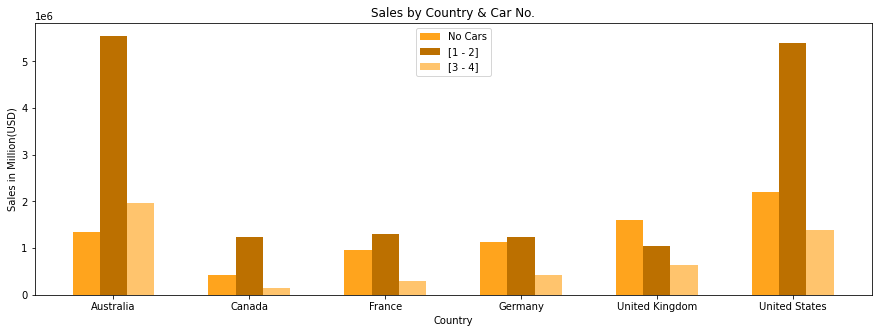

In [189]:
index = np.arange(len(country_cr))
w = 0.2
plt.figure(figsize = (15,5))
plt.bar(index,sales_by_country_cars['No Cars'],w, label = "No Cars", color = '#FFA41D')
plt.bar(index + 0.2,sales_by_country_cars['[1 - 2]'],w, label = "[1 - 2]", color = '#BC7000')
plt.bar(index + 0.4,sales_by_country_cars['[3 - 4]'],w, label = "[3 - 4]", color = '#FFC46D')

plt.title('Sales by Country & Car No.')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Country')
plt.xticks(index + 0.2, country_cr)
plt.legend()




In [190]:
sales_by_country_num_child = bikes_wholesale_business.pivot_table(index = 'country', columns = 'num_child_category', values = 'Sales', aggfunc='sum')

In [192]:
sales_by_country_num_child

num_child_category,5,No Kids,[1 - 2],[3 - 4]
country,,,,
Australia,1.183266e+06,6.446258e+06,9.182538e+05,304273.0291
Canada,1.232317e+04,1.129607e+06,5.035961e+05,175776.2467
France,1.120490e+03,1.196163e+06,1.028483e+06,327808.9122
Germany,1.775196e+05,1.388586e+06,5.856470e+05,656761.2832
United Kingdom,3.608630e+05,1.670562e+06,6.647762e+05,586641.3313
United States,7.842119e+04,5.492431e+06,2.574131e+06,854876.3260


In [193]:
cols = sales_by_country_num_child.columns.tolist()

In [194]:
cols

['5', 'No Kids', '[1 - 2]', '[3 - 4]']

In [195]:
cols = cols[1:] + cols[:1]

In [196]:
cols

['No Kids', '[1 - 2]', '[3 - 4]', '5']

In [197]:
sales_by_country_num_child = sales_by_country_num_child[cols]

In [198]:
sales_by_country_num_child

num_child_category,No Kids,[1 - 2],[3 - 4],5
country,,,,
Australia,6.446258e+06,9.182538e+05,304273.0291,1.183266e+06
Canada,1.129607e+06,5.035961e+05,175776.2467,1.232317e+04
France,1.196163e+06,1.028483e+06,327808.9122,1.120490e+03
Germany,1.388586e+06,5.856470e+05,656761.2832,1.775196e+05
United Kingdom,1.670562e+06,6.647762e+05,586641.3313,3.608630e+05
United States,5.492431e+06,2.574131e+06,854876.3260,7.842119e+04


In [191]:
country_cd = sales_by_country_num_child.index

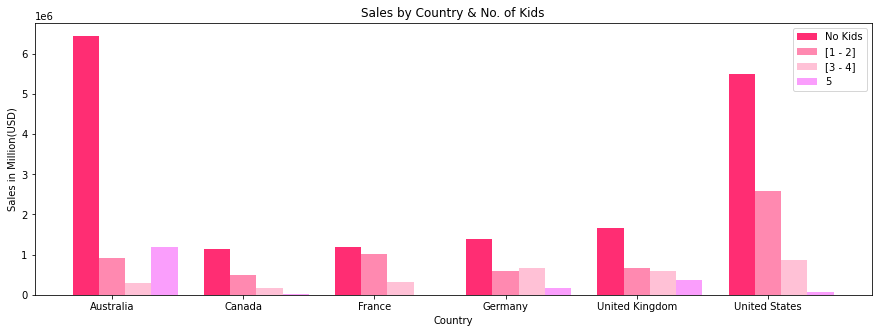

In [200]:
index = np.arange(len(country_cr))
w = 0.2
plt.figure(figsize = (15,5))
plt.bar(index,sales_by_country_num_child['No Kids'],w, label = "No Kids", color = '#FF2D73')
plt.bar(index + 0.2,sales_by_country_num_child['[1 - 2]'],w, label = "[1 - 2]", color = '#FF89B0')
plt.bar(index + 0.4,sales_by_country_num_child['[3 - 4]'],w, label = "[3 - 4]", color = '#FFC1D6')
plt.bar(index + 0.6,sales_by_country_num_child['5'],w, label = "5", color = '#FA9EFC')

plt.title('Sales by Country & No. of Kids')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Country')
plt.xticks(index + 0.2, country_cd)
plt.legend()


In [203]:
avg_freight_trend_by_country = bikes_wholesale_business.pivot_table(index = ['Order Year','Order Quarter'], columns = 'country', values = 'freight', aggfunc='mean')

In [204]:
avg_freight_trend_by_country

country                   Australia     Canada     France    Germany  \
Order Year Order Quarter                                               
2016       3              83.267180  81.875629  78.884827  82.110303   
           4              82.884777  75.052281  74.060359  75.680857   
2017       1              81.559940  87.017355  69.494326  77.573147   
           2              79.974927  86.126019  72.751368  70.382671   
           3              48.889321  52.572655  47.955333  45.779198   
           4              46.771621  38.580568  45.399956  42.936409   
2018       1              47.348973  45.506556  45.306642  47.249971   
           2              45.956935  39.825533  42.425212  43.773838   
           3              43.273793  39.064967  40.913903  40.720479   
           4              40.883667  37.387482  40.624445  38.575284   
2019       1              41.102761  43.963411  38.782345  39.483962   
           2              38.783164  40.099322  38.900144  37.313495   

country                   United Kingdom  United States  
Order Year Order Quarter                                 
2016       3                   75.843884      80.344682  
           4                   76.038436      80.906114  
2017       1                   82.221285      78.533929  
           2                   81.516366      80.182402  
           3                   44.038179      47.189447  
           4                   45.347089      40.950710  
2018       1                   44.934557      38.812072  
           2                   42.142244      38.754455  
           3                   40.757447      37.478606  
           4                   38.600794      39.021356  
2019       1                   40.835017      39.006191  
           2                   38.540578      39.584360

In [208]:
yr_qr_fr = []
for yr, qr in avg_freight_trend_by_country.index:
    yrqr = "{0} Q{1}".format(yr,qr)
    yr_qr_fr.append(yrqr)

In [209]:
yr_qr_fr

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

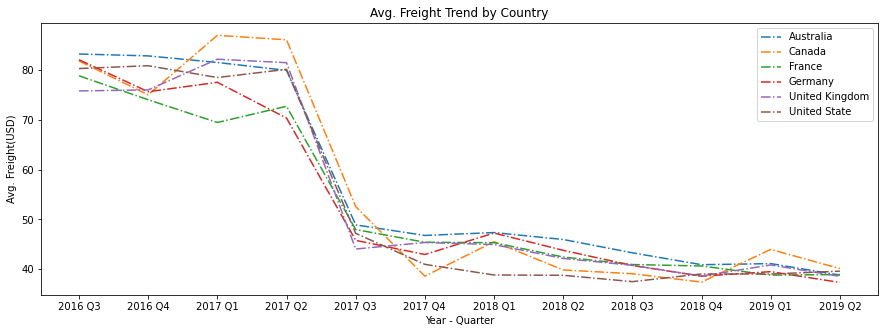

In [211]:

plt.figure(figsize = (15,5))
plt.plot(yr_qr_fr,avg_freight_trend_by_country['Australia'], linestyle = '-.', label = 'Australia')
plt.plot(yr_qr_fr,avg_freight_trend_by_country['Canada'], linestyle = '-.', label = 'Canada')
plt.plot(yr_qr_fr,avg_freight_trend_by_country['France'], linestyle = '-.', label = 'France')
plt.plot(yr_qr_fr,avg_freight_trend_by_country['Germany'], linestyle = '-.', label = 'Germany')
plt.plot(yr_qr_fr,avg_freight_trend_by_country['United Kingdom'], linestyle = '-.', label = 'United Kingdom')
plt.plot(yr_qr_fr,avg_freight_trend_by_country['United States'], linestyle = '-.', label = 'United State')

plt.legend()
plt.title('Avg. Freight Trend by Country')
plt.ylabel('Avg. Freight(USD)')
plt.xlabel('Year - Quarter')

plt.show()

In [219]:
bikes_wholesale_business

,order_date,customer_key,name,birth_date,marital_status,gender,yearly_income,num_children,occupation,house_owner,...,region,country,income_group,num_child_category,num_cars_category,Owns a House?,Sales,Order Year,Order Quarter,Today Date
0,2016-07-01,14501,Ruben Prasad,1958-05-13,Married,Male,80000,0,Management,1,...,Southwest,United States,[51K - 80K],No Kids,[1 - 2],Owns House,699.0982,2016,3,2020-01-01
1,2016-07-22,11000,Jon Yang,1986-04-08,Married,Male,90000,0,Professional,1,...,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,3399.9900,2016,3,2020-01-01
2,2018-07-22,11000,Jon Yang,1986-04-08,Married,Male,90000,0,Professional,1,...,Australia,Australia,[81K - 100K],No Kids,No Cars,Owns House,2319.9900,2018,3,2020-01-01
3,2016-08-19,14572,Melanie Foster,1991-04-16,Married,Female,70000,0,Professional,1,...,Southwest,United States,[51K - 80K],No Kids,No Cars,Owns House,699.0982,2016,3,2020-01-01
4,2016-07-18,11001,Eugene Huang,1985-05-14,Single,Male,60000,3,Professional,0,...,Australia,Australia,[51K - 80K],[3 - 4],[1 - 2],Doesn't Owns House,3374.9900,2016,3,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,2019-06-30,27473,Gabriel Lal,1968-01-10,Single,Male,20000,1,Clerical,1,...,Australia,Australia,[10K - 30K],[1 - 2],[1 - 2],Owns House,539.9900,2019,2,2020-01-01
15201,2019-06-30,26916,Mackenzie King,2000-08-08,Married,Female,10000,0,Manual,1,...,Australia,Australia,[10K - 30K],No Kids,[1 - 2],Owns House,539.9900,2019,2,2020-01-01
15202,2019-06-30,22202,Roberto Diaz,1977-07-06,Married,Male,70000,0,Professional,1,...,Australia,Australia,[51K - 80K],No Kids,[1 - 2],Owns House,2443.3500,2019,2,2020-01-01
15203,2019-06-30,11512,Natalie Campbell,1974-08-13,Single,Female,20000,0,Manual,1,...,Canada,Canada,[10K - 30K],No Kids,[1 - 2],Owns House,2319.9900,2019,2,2020-01-01


In [221]:
sales_by_country_house_ownership = bikes_wholesale_business.pivot_table(index = 'country', columns = 'Owns a House?', values = 'Sales', aggfunc='sum')

In [222]:
sales_by_country_house_ownership

Owns a House?,Doesn't Owns House,Owns House
country,,
Australia,3.183582e+06,5.668468e+06
Canada,5.442143e+05,1.277088e+06
France,6.176292e+05,1.935947e+06
Germany,7.378612e+05,2.070653e+06
United Kingdom,9.090759e+05,2.373767e+06
United States,2.662649e+06,6.337211e+06


In [223]:
country_ownh = sales_by_country_house_ownership.index

In [224]:
country_ownh

Index(['Australia', 'Canada', 'France', 'Germany', 'United Kingdom',
       'United States'],
      dtype='object', name='country')

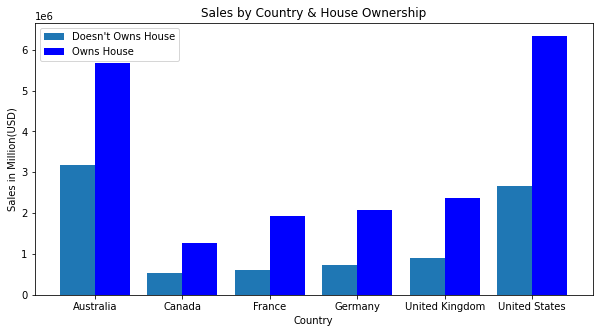

In [225]:
index = np.arange(len(country_ownh))
w = 0.4
plt.figure(figsize = (10,5))
plt.bar(index,sales_by_country_house_ownership["Doesn't Owns House"],w, label = "Doesn't Owns House")
plt.bar(index + 0.4,sales_by_country_house_ownership['Owns House'],w, color = 'blue', label = "Owns House")
plt.title('Sales by Country & House Ownership')
plt.ylabel('Sales in Million(USD)')
plt.xlabel('Country')
plt.xticks(index + 0.2, country_ownh)
plt.legend()




plt.show()

In [226]:
quantity_ordered_trend_by_country = bikes_wholesale_business.pivot_table(index = ['Order Year', 'Order Quarter'], columns = 'country', values = 'order_quantity', aggfunc='sum')

In [227]:
quantity_ordered_trend_by_country

country                   Australia  Canada  France  Germany  United Kingdom  \
Order Year Order Quarter                                                       
2016       3                    182      21      30       30              51   
           4                    212      26      29       46              45   
2017       1                    190      71      38       38              47   
           2                    200      52      44       56              32   
           3                    203      65      69       61              90   
           4                    266      38      82       78              96   
2018       1                    313      34      81       82             104   
           2                    333      30     121      110             105   
           3                    423      87     170      182             225   
           4                    618     151     220      246             337   
2019       1                    693     140     242      281             320   
           2                    839     209     318      390             406   

country                   United States  
Order Year Order Quarter                 
2016       3                        134  
           4                        207  
2017       1                        174  
           2                        251  
           3                        244  
           4                        192  
2018       1                        174  
           2                        251  
           3                        507  
           4                        806  
2019       1                        831  
           2                       1136

In [230]:
yr_qtr_qty = []
for yr, qr in quantity_ordered_trend_by_country.index:
    yrqr = "{0} Q{1}".format(yr,qr)
    yr_qtr_qty.append(yrqr)

In [231]:
yr_qtr_qty

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

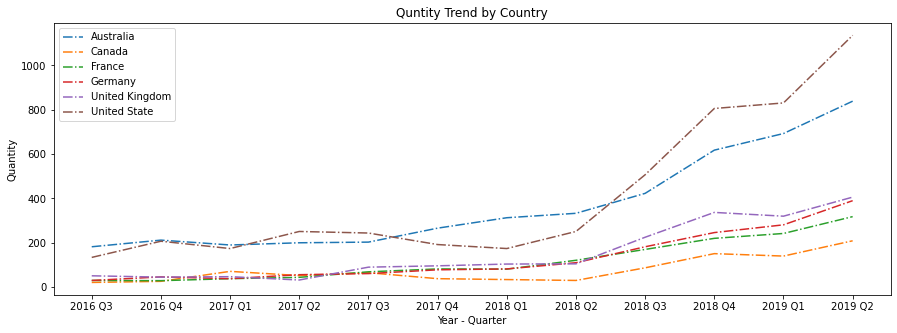

In [232]:
plt.figure(figsize = (15,5))
plt.plot(yr_qtr_qty,quantity_ordered_trend_by_country['Australia'], linestyle = '-.', label = 'Australia')
plt.plot(yr_qtr_qty,quantity_ordered_trend_by_country['Canada'], linestyle = '-.', label = 'Canada')
plt.plot(yr_qtr_qty,quantity_ordered_trend_by_country['France'], linestyle = '-.', label = 'France')
plt.plot(yr_qtr_qty,quantity_ordered_trend_by_country['Germany'], linestyle = '-.', label = 'Germany')
plt.plot(yr_qtr_qty,quantity_ordered_trend_by_country['United Kingdom'], linestyle = '-.', label = 'United Kingdom')
plt.plot(yr_qtr_qty,quantity_ordered_trend_by_country['United States'], linestyle = '-.', label = 'United State')

plt.legend()
plt.title('Quntity Trend by Country')
plt.ylabel('Quantity')
plt.xlabel('Year - Quarter')

plt.show()

In [236]:
quantity_ordered_trend_by_bike_color = bikes_wholesale_business.pivot_table(index = ['Order Year', 'Order Quarter'], columns = 'product_colour', values = 'order_quantity', aggfunc='sum')

In [237]:
quantity_ordered_trend_by_bike_color

product_colour             Black   Blue    Red  Silver  Yellow
Order Year Order Quarter                                      
2016       3                64.0    NaN  343.0    41.0     NaN
           4                90.0    NaN  432.0    43.0     NaN
2017       1                85.0    NaN  430.0    43.0     NaN
           2               111.0    NaN  466.0    58.0     NaN
           3               336.0    NaN  259.0    75.0    62.0
           4               336.0    NaN  225.0   107.0    84.0
2018       1               355.0    NaN  206.0   146.0    81.0
           2               403.0    NaN  224.0   193.0   130.0
           3               689.0  179.0   36.0   310.0   380.0
           4               874.0  322.0   35.0   470.0   677.0
2019       1               874.0  345.0   37.0   517.0   734.0
           2              1092.0  437.0   26.0   688.0  1055.0

In [238]:
yr_qtr_color = []
for yr, qr in quantity_ordered_trend_by_bike_color.index:
    yrqr = "{0} Q{1}".format(yr, qr)
    yr_qtr_color.append(yrqr)

In [239]:
yr_qtr_color

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

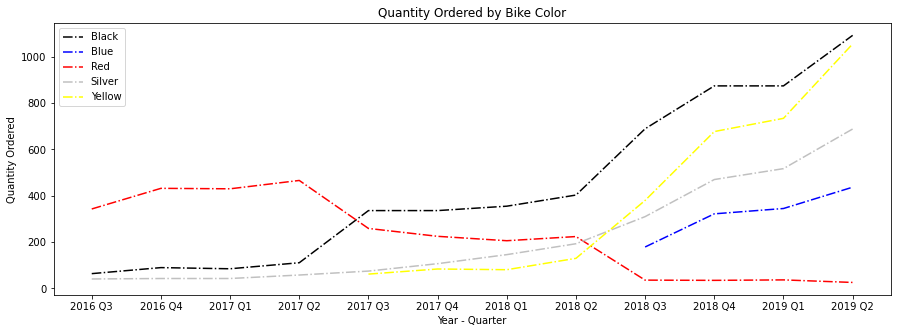

In [243]:
plt.figure(figsize = (15,5))
plt.plot(yr_qtr_color,quantity_ordered_trend_by_bike_color['Black'], linestyle = '-.', label = 'Black', color = 'black')
plt.plot(yr_qtr_color,quantity_ordered_trend_by_bike_color['Blue'], linestyle = '-.', label = 'Blue', color = 'blue')
plt.plot(yr_qtr_color,quantity_ordered_trend_by_bike_color['Red'], linestyle = '-.', label = 'Red', color = 'red')
plt.plot(yr_qtr_color,quantity_ordered_trend_by_bike_color['Silver'], linestyle = '-.', label = 'Silver', color = 'silver')
plt.plot(yr_qtr_color,quantity_ordered_trend_by_bike_color['Yellow'], linestyle = '-.', label = 'Yellow', color = 'yellow')

plt.legend()
plt.title('Quantity Ordered by Bike Color')
plt.ylabel('Quantity Ordered')
plt.xlabel('Year - Quarter')

plt.show()

In [244]:
bikes_wholesale_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15205 entries, 0 to 15204
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_date           15205 non-null  datetime64[ns]
 1   customer_key         15205 non-null  int64         
 2   name                 15205 non-null  object        
 3   birth_date           15205 non-null  datetime64[ns]
 4   marital_status       15205 non-null  object        
 5   gender               15205 non-null  object        
 6   yearly_income        15205 non-null  int64         
 7   num_children         15205 non-null  int64         
 8   occupation           15205 non-null  object        
 9   house_owner          15205 non-null  int64         
 10  num_cars             15205 non-null  int64         
 11  address              15205 non-null  object        
 12  phone                15205 non-null  object        
 13  first_purchase_date  15205 non-

In [245]:
sales_trend_by_bike_type = bikes_wholesale_business.pivot_table(index = ['Order Year', 'Order Quarter'], columns = 'product_subcategory', values = 'Sales', aggfunc='sum')

In [246]:
sales_trend_by_bike_type

product_subcategory       Mountain Bikes    Road Bikes  Touring Bikes
Order Year Order Quarter                                             
2016       3                2.541492e+05  1.199374e+06            NaN
           4                3.318240e+05  1.481027e+06            NaN
2017       1                3.149491e+05  1.476749e+06            NaN
           2                4.401987e+05  1.573813e+06            NaN
           3                3.295298e+05  1.067304e+06            NaN
           4                4.777792e+05  8.500202e+05            NaN
2018       1                6.261848e+05  7.873455e+05            NaN
           2                7.809162e+05  8.430548e+05            NaN
           3                1.081343e+06  1.028987e+06      459348.96
           4                1.501195e+06  1.292642e+06      958085.97
2019       1                1.658240e+06  1.280739e+06     1085045.70
           2                2.156451e+06  1.639528e+06     1342320.42

In [247]:
yr_qrt_bkty = []
for yr, qr in sales_trend_by_bike_type.index:
    yrqr = "{0} Q{1}".format(yr, qr)
    yr_qrt_bkty.append(yrqr)

In [248]:
yr_qrt_bkty

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

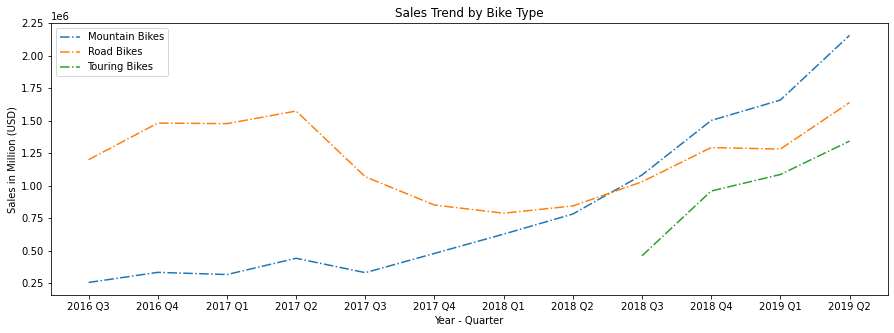

In [250]:
plt.figure(figsize = (15,5))
plt.plot(yr_qrt_bkty,sales_trend_by_bike_type['Mountain Bikes'], linestyle = '-.', label = 'Mountain Bikes')
plt.plot(yr_qrt_bkty,sales_trend_by_bike_type['Road Bikes'], linestyle = '-.', label = 'Road Bikes')
plt.plot(yr_qrt_bkty,sales_trend_by_bike_type['Touring Bikes'], linestyle = '-.', label = 'Touring Bikes')

plt.legend()
plt.title('Sales Trend by Bike Type')
plt.ylabel('Sales in Million (USD)')
plt.xlabel('Year - Quarter')

plt.show()

In [251]:
sales_trend_by_bike_size_range = bikes_wholesale_business.pivot_table(index = ['Order Year', 'Order Quarter'], columns = 'size_range', values = 'Sales', aggfunc='sum')

In [252]:
sales_trend_by_bike_size_range

size_range                    38-40 CM      42-46 CM     48-52 CM  \
Order Year Order Quarter                                            
2016       3              7.802477e+04  3.444892e+05  543297.1148   
           4              9.144973e+04  4.711756e+05  617451.1286   
2017       1              9.154973e+04  4.083572e+05  688958.7496   
           2              1.015497e+05  4.753061e+05  818695.0342   
           3              1.116793e+05  4.773230e+05  534304.2250   
           4              1.846107e+05  4.995354e+05  403524.5450   
2018       1              2.431573e+05  6.435996e+05  365850.5950   
           2              3.001909e+05  7.447377e+05  330133.4275   
           3              5.125394e+05  1.136853e+06  502829.4100   
           4              6.704704e+05  1.672442e+06  729476.5200   
2019       1              7.999991e+05  1.790077e+06  688466.7500   
           2              1.077744e+06  2.335015e+06  866419.1900   

size_range                   54-58 CM     60-62 CM  
Order Year Order Quarter                            
2016       3              196722.0710  290989.7294  
           4              302506.4166  330267.9204  
2017       1              284697.8456  318134.9140  
           2              297529.9502  320931.3068  
           3              248471.4050   25055.6800  
           4              196281.3125   43847.4400  
2018       1              125688.3225   35234.5500  
           2              207410.5800   41498.4700  
           3              301753.3500  115702.6500  
           4              477037.0200  202497.1800  
2019       1              487902.4200  257580.5100  
           2              567642.3800  291478.5000

In [253]:
yr_qrt_szrng = []
for yr, qr in sales_trend_by_bike_size_range.index:
    yrqr = "{0} Q{1}".format(yr, qr)
    yr_qrt_szrng.append(yrqr)

In [254]:
yr_qrt_szrng

['2016 Q3',
 '2016 Q4',
 '2017 Q1',
 '2017 Q2',
 '2017 Q3',
 '2017 Q4',
 '2018 Q1',
 '2018 Q2',
 '2018 Q3',
 '2018 Q4',
 '2019 Q1',
 '2019 Q2']

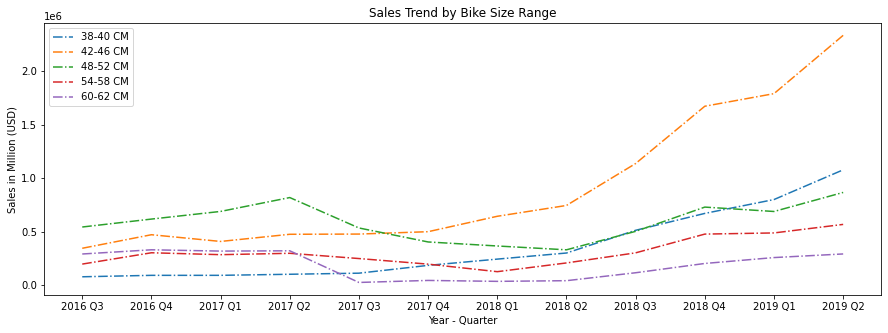

In [255]:
plt.figure(figsize = (15,5))
plt.plot(yr_qrt_szrng,sales_trend_by_bike_size_range['38-40 CM'], linestyle = '-.', label = '38-40 CM')
plt.plot(yr_qrt_szrng,sales_trend_by_bike_size_range['42-46 CM'], linestyle = '-.', label = '42-46 CM')
plt.plot(yr_qrt_szrng,sales_trend_by_bike_size_range['48-52 CM'], linestyle = '-.', label = '48-52 CM')
plt.plot(yr_qrt_szrng,sales_trend_by_bike_size_range['54-58 CM'], linestyle = '-.', label = '54-58 CM')
plt.plot(yr_qrt_szrng,sales_trend_by_bike_size_range['60-62 CM'], linestyle = '-.', label = '60-62 CM')

plt.legend()
plt.title('Sales Trend by Bike Size Range')
plt.ylabel('Sales in Million (USD)')
plt.xlabel('Year - Quarter')

plt.show()

In [265]:
sales_quantity_correlation_by_income_group = bikes_wholesale_business.groupby('income_group').sum()[['Sales', 'order_quantity']]

In [266]:
sales_quantity_correlation_by_income_group

,Sales,order_quantity
income_group,,
150K+,5.237241e+05,249
[101K - 150K],3.131575e+06,1467
[10K - 30K],6.073884e+06,3810
[31K - 50K],4.833451e+06,2766
[51K - 80K],1.070217e+07,5484
[81K - 100K],3.053340e+06,1429


In [267]:
col_incg = sales_quantity_correlation_by_income_group.index.to_list()

In [268]:
col_incg

['150K+',
 '[101K - 150K]',
 '[10K - 30K]',
 '[31K - 50K]',
 '[51K - 80K]',
 '[81K - 100K]']

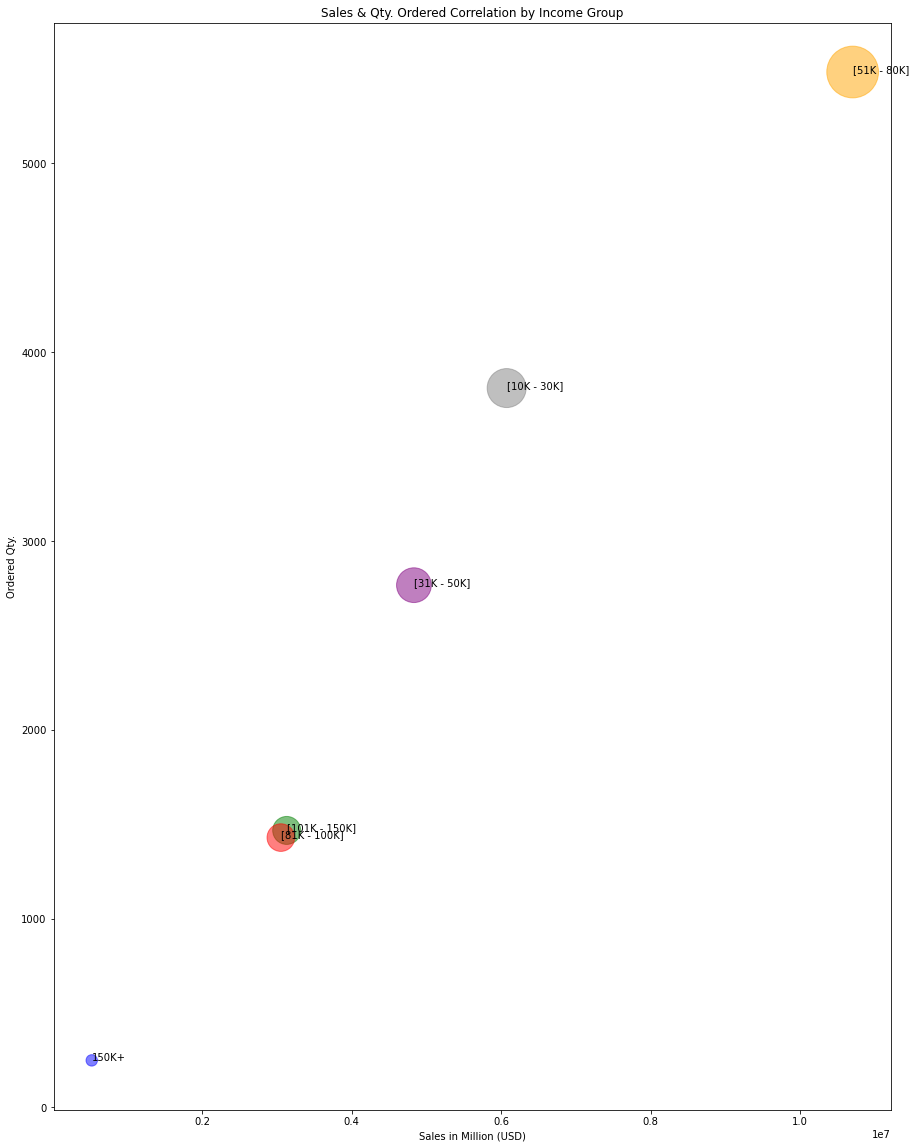

In [305]:
plt.figure(figsize = (15,20))
plt.scatter(sales_quantity_correlation_by_income_group['Sales'],sales_quantity_correlation_by_income_group['order_quantity'],
           s = sales_quantity_correlation_by_income_group['Sales']/4000, alpha = 0.5, 
           c = ['blue','green','gray','purple','orange','red']
           )

x,y = sales_quantity_correlation_by_income_group['Sales'], sales_quantity_correlation_by_income_group['order_quantity']
for index, inc_group in enumerate(sales_quantity_correlation_by_income_group.index):
    plt.annotate(inc_group,(x[index],y[index]))
    
plt.xlabel('Sales in Million (USD)')
plt.ylabel('Ordered Qty.')
plt.title('Sales & Qty. Ordered Correlation by Income Group')



plt.show()

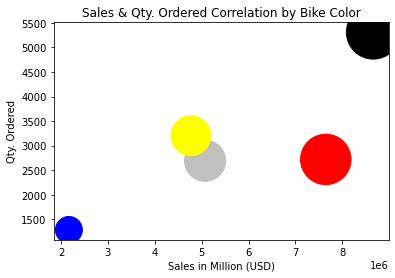

In [313]:
sales_qty_correlation_by_color = bikes_wholesale_business.groupby('product_colour').sum()[['Sales', 'order_quantity']]
plt.scatter(sales_qty_correlation_by_color['Sales'], sales_qty_correlation_by_color['order_quantity'],
            c = sales_qty_correlation_by_color.index, s = sales_qty_correlation_by_color['Sales']/3000
           )

plt.title('Sales & Qty. Ordered Correlation by Bike Color')
plt.xlabel('Sales in Million (USD)')
plt.ylabel('Qty. Ordered')



plt.show()

In [310]:
sales_qty_correlation_by_color

,Sales,order_quantity
product_colour,,
Black,8.659117e+06,5309
Blue,2.169056e+06,1283
Red,7.646303e+06,2719
Silver,5.073081e+06,2691
Yellow,4.770588e+06,3203


28318144.650700003

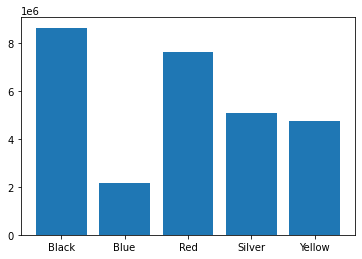

In [312]:
plt.bar(sales_qty_correlation_by_color.index,sales_qty_correlation_by_color['Sales'])
bikes_wholesale_business['Sales'].sum()